# Spectral unmixing of fluorescent dyes

Adapted from *Marina Alterman, Yoav Schechner, and Aryeh Weiss, “Multiplexed Fluorescence Unmixing” (2010): 1–8.*


A mixture of $n_{dyes}$ dyes is excited with $S$ different laser line configurations, and the emitted flourescence is measured at $F$ diffrent wavelength bands. For a particular exitation source $s$ and filter band $f$ the corresponding intensity of the image $i_{f,s}$ is given by

$$i_{f,s} = \frac{q_{elect}^{cam}(f)}{g_{gray}^{cam}} \sum_{d=0}^{n_{dyes}} \mathcal{P}\left( N_{d} \left( f,s \right) \right) + \frac{1}{g_{gray}^{cam}} \mathcal{N}\left( 0,\sigma^2_{elect} \right)$$

where

$i_{f,s} \; \left[ \textrm{graylevel} \right]$ gray-scale value of signal in emission filter band $f$ with excitation source $s$.

$g_{gray}^{cam} \; \left[ \textrm{elect} \cdot \textrm{graylevel}^{-1} \right]$ conversion factor from photoelectrons to camera gray-scale values.

$q_{elect}^{cam}(f) \; \left[ \textrm{elect} \cdot \textrm{photon}^{-1} \right]$ quantum efficiency of the detector in filter band $f$.

$n_{dyes} \; \left[ \textrm{int} \right]$ number of dyes.

$N_{d} \left( f,s \right) \; \left[ \textrm{photons} \right]$ expected number of photons from dye $d$ in filter band $f$ with exication source $s$. $N_{0} \left( f,s \right)$ is the expected number of background photons.

$\sigma_{elect} \; \left[ \textrm{electron} \right]$ is the standard deviation of the sensor noise.

$\mathcal{P} \left( \lambda \right)$ is a poisson distribution with rate $\lambda$.

$\mathcal{N} \left( \mu, \sigma^2 \right)$ is a normal distribution with mean $\mu$ and variance $\sigma^2$.



The expected number of photons from dye $d$ in filter band $f$ with exication source $s$ can be determined from the total collected number of photons for that dye by

$$N_{d} \left( f,s \right) = \alpha_{d}(s) \epsilon_{d}(f) N_d^{Tot}$$

where

$N_d^{Tot}$ is the total number of photons collected from dye $d$.

$\alpha_{d}(s)$ is the normalised absorption of dye $d$ of source $s$. This factor can take into account different exciation powers for different sources $s$.

$\epsilon_{d}(f)$ is the normalised emission of dye $d$ in band $f$. This factor can take into account different transmission coefficicents for different bands $f$.

$ 0 \leq \alpha_{d}(s), \; 0 \leq \epsilon_{d}(f) \; \forall \; s, d$ and $\sum_{f,s}\alpha_{d}(s) \epsilon_{d}(f) = 1$.






## setup

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## image simulation

In [90]:
from numpy import outer, asarray
from numpy.random import poisson, normal

def generate(count, coeff, config):
    emission = asarray(coeff['emission'])
    excitation = asarray(coeff['excitation'])
    tmp = asarray([outer(x, y) for x,y in zip(emission, excitation)])
    norm = tmp.sum(axis=(1,2))
    count_bin = asarray([y*z/x for x,y,z in zip(norm, count, tmp)])
    
    signal = poisson(count_bin).sum(axis=0)*config['qe']
    signal += normal(loc=0, scale=config['noise'], size=signal.shape)
    return (signal/config['graylevel']).astype(int)


In [114]:
from scipy.stats import norm
from numpy import linspace
x_wv = linspace(400,700,32)
centers = [505, 561, 600]
y_em = asarray([norm.pdf(x_wv, c, 20) for c in centers])

x = linspace(400,700,5)
centers = [488, 541, 565]
y_ex = asarray([norm.pdf(x, c, 60) for c in centers])





In [111]:
y_ex

array([[  2.26804137e-03,   6.49478769e-03,   3.89846659e-03,
          4.90498346e-04,   1.29358851e-05],
       [  4.20303665e-04,   3.63086962e-03,   6.57465552e-03,
          2.49545776e-03,   1.98537393e-04],
       [  1.51559375e-04,   2.15862659e-03,   6.44446861e-03,
          4.03284541e-03,   5.28994197e-04]])

In [112]:
# create coefficients and configuration
# could optionally load from JSON files (see test/resources for examples)
config = {'noise': 0.5,
         'graylevel' : 50,
         'qe' : 0.85
         }
coeff = {'emission': y_em, 'excitation': y_ex}
count = [1000, 100000, 100000]

signal = generate(count, coeff, config)
#estimate = infer(signal=signal, coeff=coeff)
#accuracy = compare(estimate, count)

print(signal)

[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   1   1   0   0]
 [  0   2   2   0   0]
 [  0   4   5   1   0]
 [  1   9  14   4   0]
 [  2  20  34  13   0]
 [  4  39  75  27   2]
 [  7  66 120  47   3]
 [  9  89 172  62   6]
 [ 11 100 194  79   7]
 [ 10  94 197  92  10]
 [  8  82 198 102  11]
 [  6  74 192 110  14]
 [  4  63 175 103  13]
 [  3  45 136  82  10]
 [  1  28  86  53   7]
 [  1  14  42  27   3]
 [  0   5  17  11   1]
 [  0   1   6   3   0]
 [  0   0   1   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


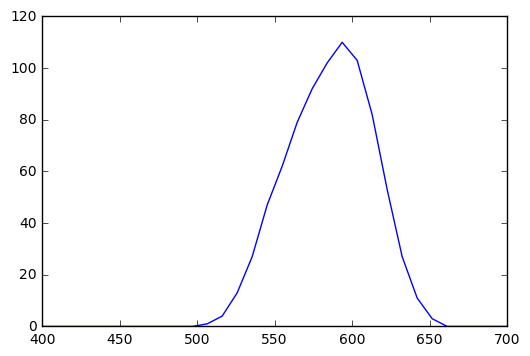

In [119]:
plt.plot(x_wv, signal[:,3]);

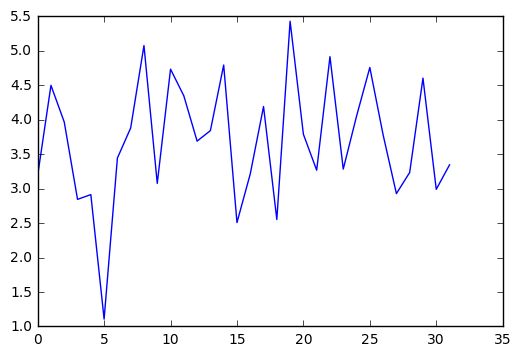

In [82]:
plt.plot(coeff['emission'][0]);

In [80]:
signal

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [4]:
100*1e-9*6.022*1e23*1e3*1e-7*1e-7*1e-7

0.060219999999999996